# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 10 Особенности координатных осей

### Содержание главы

1. Дополнительная координатная ось;

2. Работа с легендой дополнительной оси;

3. Единая легенда;

4. Графики с логарифмическими координатными осями.

**Деления (ticks)** неотделимы от координатной оси на которой они находятся. Однако свойства самих делений (цвет, длина, толщина и др.), и их подписей (кегль, поворот, цвет шрифта, шрифт и др.), а также связанные с ними линии вспомогательной сетки grid, удобно хранить в отдельном хранилище-контейнере Ticks, а не в контейнере Axis. Повторюсь, что эти вещи очень связаны и одно в отрыве от другого теряет смысл. Тем более, что для удобства пользователей разработчики сделали множество методов для работы с делениями из контейнеров более высокого уровня (Axes, Axis). 

### Электронные ресурсы:

+ [Описание элементов рисунка в matplotlib](http://matplotlib.org/users/artists.html).

### 10.1 Дополнительная координатная ось

Иногда требуется нанести на один рисунок две величины, имеющие общие единицы измерения по одной оси, но разные по другой. Например, это могут быть временные ряды сильно отличающихся по масштабу величин. Или ряды величин, имеющих разные единицы измерения. В таких случаях удобно нарисовать дополнительную координатную ось (обычно - ординат). 

Такую возможность обеспечивает метод **ax.twinx()** для оси OX и метод **ax.twiny()** для оси OY. В результате создаётся ещё одна область рисования, совпадающая по размерам с исходной. На каждой области рисуются соответствюущие значения, при этом с помощью пользовательской настройки подписей осей ординат можно добиться, чтобы вспомогательные сетки grid обеих областей совпадали.

Результат работы метода twinx <class 'matplotlib.axes._subplots.AxesSubplot'>


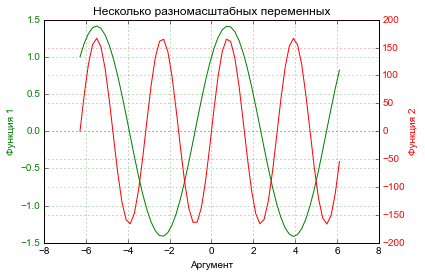

In [2]:
# Пример 10.1

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # Создаём вторую область рисования ax2
print 'Результат работы метода twinx %s' % type(ax2)

ax1.plot(x, f, label = u'Сумма cos и sin', color='green')
ax1.set_xlabel(u'Аргумент')
ax1.set_ylabel(u'Функция 1', color='green')
ax1.grid(True, color='green')
ax1.tick_params(axis='y', which='major', labelcolor='green')

ax2.plot(x, y*333, label = u'Произведение cos и sin', color='red')
ax2.set_ylabel(u'Функция 2', color='red')
ax2.grid(True, color='red')
ax2.tick_params(axis='y', which='major', labelcolor='red')

ax1.set_title(u'Несколько разномасштабных переменных')

save('pic_10_1', fmt='png')
save('pic_10_1', fmt='pdf')

plt.show()

### 10.2 Работа с легендой дополнительной оси

Если график, где присутствует дополнительная координатная ось, выполнен в чёрно-белом варианте, понять какой график относится к левой шкале, а какой к правой невозможно. В таком случае необходимо использовать легенду для идентификации данных. При работе с легендой такого графика есть свои нюансы.

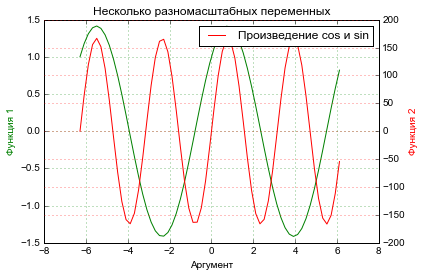

In [3]:
# Пример 10.2.1

from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)

fig = plt.figure()
# Явно задаём область рисования в виде четырёхуголника
ax1 = fig.add_subplot(111) 
ax2 = ax1.twinx() # Создаём вторую шкалу ax2

ax1.plot(x, f, label = u'Сумма cos и sin', color='green')
ax1.set_xlabel(u'Аргумент')
ax1.set_ylabel(u'Функция 1', color='green')
ax1.grid(True, color='green')

ax2.plot(x, y*333, label = u'Произведение cos и sin', color='red')
ax2.set_ylabel(u'Функция 2', color='red')
ax2.grid(True, color='red')
#ax2.legend()

ax1.set_title(u'Несколько разномасштабных переменных')

# Легенда для всего рисунка fig
plt.legend()

save('pic_10_2_1', fmt='png')
save('pic_10_2_1', fmt='pdf')

plt.show()

Несмотря на то, что было указано нарисовать легенду ко всему рисунку, отобразилась легенда только для одной координатной оси из двух!

На самом деле обе подписи легенды отобразились верно, но более новая легенда перезатёрла предыдущую. Потери можно избежать, если указать другое место расположения. Чтобы каждая подпись была в своём месте, нужно воспользоваться методом `ax.legend()`, а не `plt.legend()`.

Расположение легенды задаётся параметром loc метода legend(), который принимает значения в виде цифр (1-9), начиная от верхнего левого угла и заканчивая нижним правым, и в виде условных обозначений. Значение loc='best' автоматически выберет место на рисунке, где легенда меньше всего будет "портить" график. Также можно убрать рамку вокруг легенды для визуального уменьшения места (frameon=False), занимаемого легендой, снижая тем самым геометрическое давление рисунка в целом.

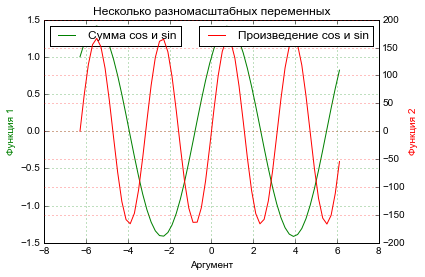

In [4]:
# Пример 10.2.2

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx() # Создаём вторую шкалу ax2

ax1.plot(x, f, label = u'Сумма cos и sin', color='green')
ax1.set_xlabel(u'Аргумент')
ax1.set_ylabel(u'Функция 1', color='green')
ax1.grid(True, color='green')
ax1.legend(loc=2) 

ax2.plot(x, y*333, label = u'Произведение cos и sin', color='red')
ax2.set_ylabel(u'Функция 2', color='red')
ax2.grid(True, color='red')
ax2.legend(loc=1)

plt.title(u'Несколько разномасштабных переменных')

save('pic_10_2_2', fmt='png')
save('pic_10_2_2', fmt='pdf')

plt.show()

### 10.3 Единая легенда

Если есть необходимость объединить обе легенды, сделав её единой, то можно пойти на следующую хитрость:

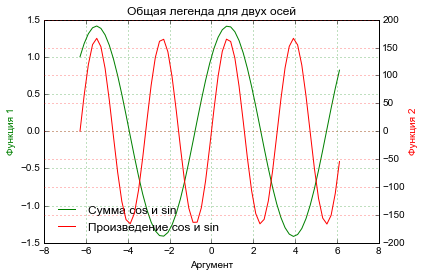

In [5]:
# Пример 10.3

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
f = np.sin(x) + np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
line1 = ax1.plot(x, f, label = u'Сумма cos и sin', color='green')
ax1.set_xlabel(u'Аргумент')
ax1.set_ylabel(u'Функция 1', color='green')
ax1.grid(True, color='green')

ax2 = ax1.twinx() # Создаём вторую шкалу ax2
line2 = ax2.plot(x, y*333, label = u'Произведение cos и sin', color='red')
ax2.set_ylabel(u'Функция 2', color='red')
ax2.grid(True, color='red')

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3, frameon=False)

plt.title(u'Общая легенда для двух осей')

save('pic_10_3', fmt='png')
save('pic_10_3', fmt='pdf')

plt.show()

### 10.4 Графики с логарифмическими координатными осями

Иногда очень удобно использовать не стандартную равномерную шкалу на координатных осях, а логарифмическую. 

Сделать шкалу координатной оси логарифмической позволяют методы `plt.xscale('log')/plt.yscale('log')` или для областей рисования - `ax.set_xscale('log')/ax.set_yscale('log')`.

> Из определения натурального логарифма и экспоненты вытекает следующий факт: если ось ординат имеет логарифмическую шкалу, то график функции, которая равна экспоненте от аргумента, будет выглядеть как прямая линия.

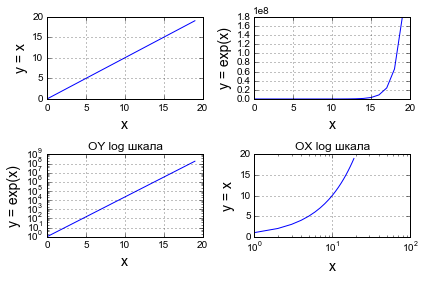

In [6]:
# Пример 10.4.1

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = np.exp(x)

fig = plt.figure()

# 1 x и y=x
ax = fig.add_subplot(221)
ax.plot(x, x)
ax.grid(True)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = x', fontsize=14)

# 2 x и y=exp(x) 
ax = fig.add_subplot(222)
ax.plot(x, y)
ax.grid(True)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = exp(x)', fontsize=14)

# 3 x и y=exp(x). OY с log шкалой
ax = fig.add_subplot(223)
ax.set_yscale('log')    # log здесь - натуральный логарифм!
# для работы с типом axis -> ax.set_yscale('log') 
ax.plot(x, y)
ax.grid(True)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = exp(x)', fontsize=14)
ax.set_title(u'OY log шкала', loc='center')

# 4  x и y=x. OX с log шкалой
ax = fig.add_subplot(224)
ax.set_xscale('log')    # log здесь - натуральный логарифм!
ax.plot(x, x)
ax.grid(True)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = x', fontsize=14)
ax.set_title(u'OX log шкала', loc='center')

# Автоматическое форматирование риснука
plt.tight_layout() 

save('pic_10_4_1', fmt='png')
save('pic_10_4_1', fmt='pdf')

plt.show()

Для того, чтобы выразить обе координатные оси в логарифмических шкалах, существует метод `plt.loglog()` или `ax.loglog()`.

C:\Users\pashabanov\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


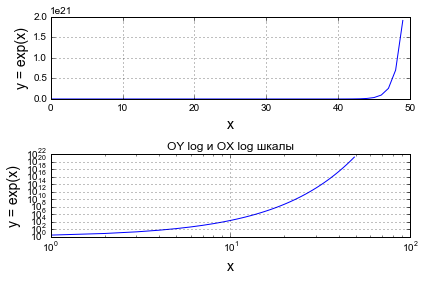

In [7]:
# Пример 10.4.2

x = np.arange(50)
y = np.exp(x)

fig = plt.figure()

# 1 Обычные шкалы
ax = fig.add_subplot(211)
ax.plot(x, y)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = exp(x)', fontsize=14)
ax.grid(True)
ax.legend(loc='best', frameon=False)

# Log шкалы
ax = fig.add_subplot(212)
ax.loglog() 
ax.plot(x, y)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y = exp(x)', fontsize=14)
ax.set_title(u'OY log и OX log шкалы')
ax.grid(True)

plt.tight_layout()

save('pic_10_4_2', fmt='png')
save('pic_10_4_2', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

> + [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)